<a href="https://colab.research.google.com/github/ahmedmek1/Machine-learning-projects-sklearn/blob/main/decsionTreePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [4]:
data = pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
round((data.isnull().sum(axis = 0 )*100)/(data.shape[0]),2)


Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

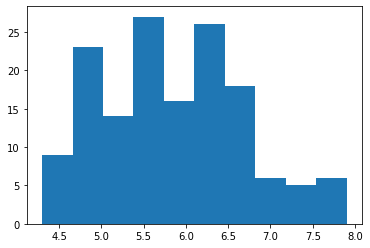

In [9]:
plt.hist(data = data , x = 'SepalLengthCm');


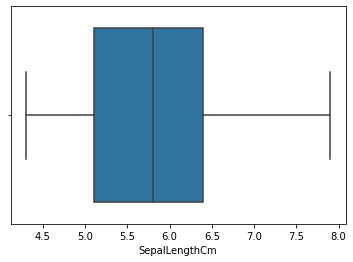

In [10]:
sns.boxplot(data = data , x = 'SepalLengthCm');

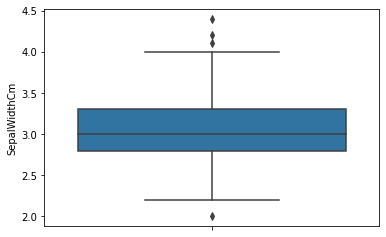

In [11]:
sns.boxplot(data = data , y = 'SepalWidthCm');

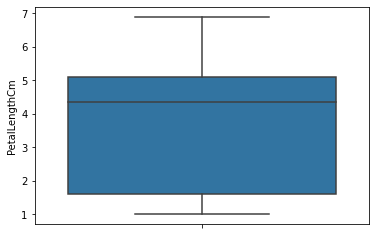

In [12]:
sns.boxplot(data = data , y = 'PetalLengthCm');

In [13]:
data.drop(columns= ['Id'] , inplace=True)

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data['Species'].nunique()

3

In [16]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

*as categorical classes names can not be used in modeling , we will replace each class with a number so that *

*   Iris-setosa will be as 0
*   Iris-versicolor will be 1
*   Iris-virginica will be 2



In [36]:
data = data.replace({'Species':{'Iris-setosa':0}})
data = data.replace({'Species':{'Iris-versicolor':1}})
data = data.replace({'Species':{'Iris-virginica':0}})


In [37]:
data['Species'].unique()

array([0, 1, 2])

In [39]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split( data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3, shuffle=True,
                                         random_state=23,stratify=data.iloc[:,-1])  
 
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test ,test_size=0.5, shuffle=True, 
                                         random_state=23,stratify=y_test)


In [ ]:
# from sklearn import svm, datasets
# >>> from sklearn.model_selection import GridSearchCV
# >>> iris = datasets.load_iris()
# >>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# >>> svc = svm.SVC()
# >>> clf = GridSearchCV(svc, parameters)
# >>> clf.fit(iris.data, iris.target)
# GridSearchCV(estimator=SVC(),
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# >>> sorted(clf.cv_results_.keys())
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split2_test_score', ...
#  'std_fit_time', 'std_score_time', 'std_test_score']

In [48]:
 #Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#fit model using grid search

dtree=DecisionTreeClassifier()
parameters = {'max_iter':[1000,3000,4000], 'C':[0.001,0.01,0.1,1,10,100]}
clf = GridSearchCV(dtree , parameters , scoring = 'accuracy')


In [49]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dtree.predict(x_test)


In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
47,0,0
121,2,2
135,2,2
25,0,0
80,1,1
104,2,2
129,2,2
12,0,0
145,2,2
88,1,1


In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.9565217391304348

### Let us visualize the Decision Tree to understand it better.



In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y


In [71]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


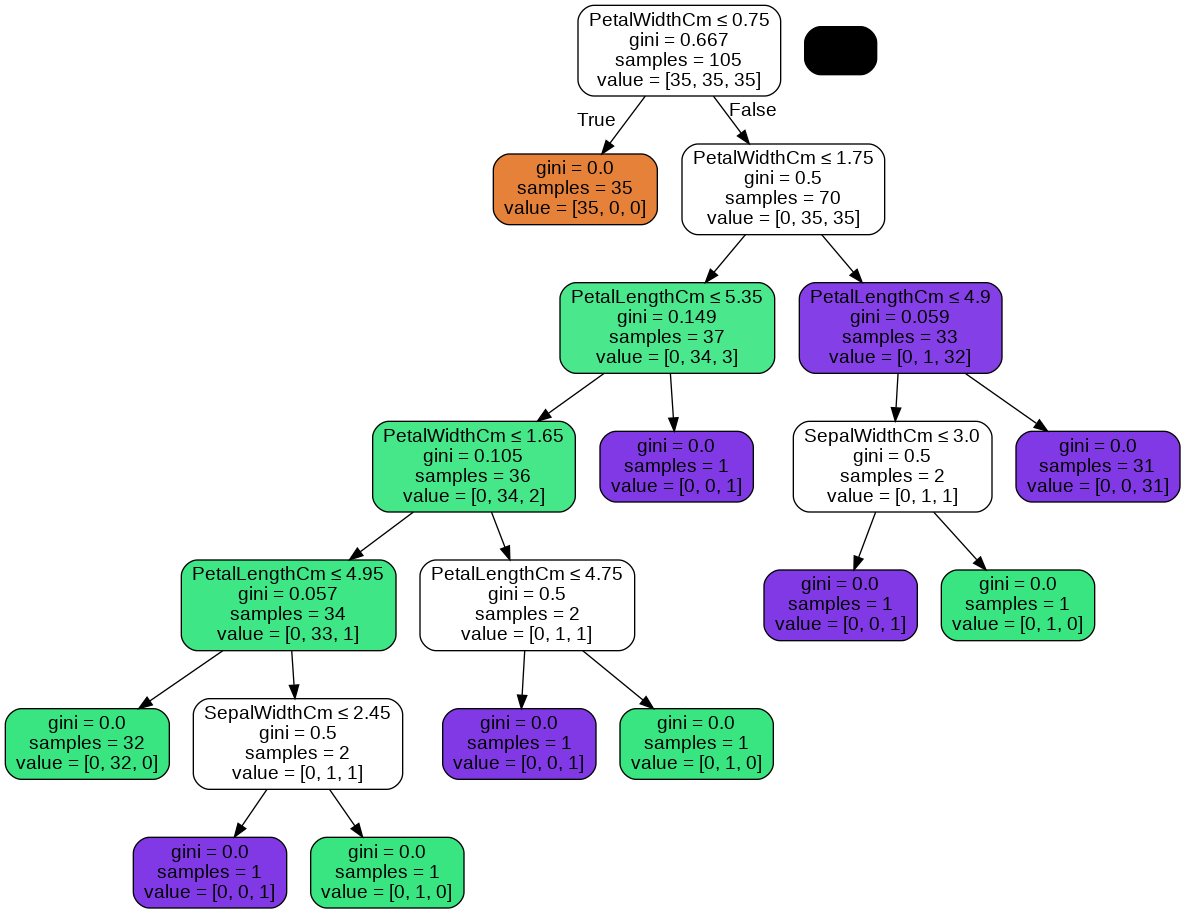

In [72]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=data.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())